# This is the accompanying code to the ftx article located here
https://docs.google.com/document/d/1glq1ueIXSpWKwY4lLOZyU1XSS262MG5zgTlALW4ziW8/edit

In [ ]:
%autosave 1

In [ ]:
# Code

In [4]:
!pip install ta

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!python3 DataGatheringTool.py

['BAL-0925', 'BALBEAR/USD', 'BALBEAR/USDT', 'BALBULL/USD', 'BALBULL/USDT', 'BALHALF/USD', 'BALHEDGE/USD', 'BAL-PERP', 'BAL/USD', 'BAL/USDT', 'COMP-0925', 'COMPBEAR/USD', 'COMPBEAR/USDT', 'COMPBULL/USD', 'COMPBULL/USDT', 'COMPHALF/USD', 'COMPHEDGE/USD', 'COMP-PERP', 'COMP/USD', 'COMP/USDT', 'CUSDT-0925', 'CUSDTBEAR/USD', 'CUSDTBEAR/USDT', 'CUSDTBULL/USD', 'CUSDTBULL/USDT', 'CUSDTHALF/USD', 'CUSDTHEDGE/USD', 'CUSDT-PERP', 'CUSDT/USD', 'CUSDT/USDT', 'DEFI-0925', 'DEFIBEAR/USD', 'DEFIBEAR/USDT', 'DEFIBULL/USD', 'DEFIBULL/USDT', 'DEFIHALF/USD', 'DEFIHEDGE/USD', 'DEFI-PERP', 'DMG-0925', 'DMGBEAR/USD', 'DMGBULL/USD', 'DMG-PERP', 'DMG/USD', 'DMG/USDT', 'KNC-0925', 'KNCBEAR/USD', 'KNCBEAR/USDT', 'KNCBULL/USD', 'KNCBULL/USDT', 'KNCHALF/USD', 'KNCHEDGE/USD', 'KNC-PERP', 'KNC/USD', 'KNC/USDT', 'MKR-0925', 'MKRBEAR/USD', 'MKRBULL/USD', 'MKR-PERP', 'MKR/USD', 'MKR/USDT', 'RUNE-0925', 'RUNE-PERP', 'RUNE/USD', 'RUNE/USDT', 'TOMO-0925', 'TOMOBEAR/USD', 'TOMOBULL/USD', 'TOMOHALF/USD', 'TOMOHEDGE/USD', '

In [1]:
# Setup charting
import os
import plotly
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib
import os
import ta
from functools import reduce

from copy import deepcopy
import pandas as pd
from talib import abstract
import talib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline
fig_size = sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(7,5)}, 
    
    style="darkgrid" # nicer layout
)



In [2]:
# read in our data

market_data = {x[:-4]:pd.read_csv(f"data/{x}") for x in os.listdir("data/") if x.find(".csv") >= 0}

perp_contracts = {k:v for k, v in market_data.items() if k.find("PERP") > 0}

print(list(perp_contracts.keys()))
list(perp_contracts.items())[0][1].head()

['DEFI-PERP', 'KNC-PERP', 'RUNE-PERP', 'DMG-PERP', 'COMP-PERP', 'MKR-PERP', 'TOMO-PERP', 'BAL-PERP', 'CUSDT-PERP']


,close,high,low,open,startTime,time,volume
0,1942.9,1961.3,1942.6,1943.2,2020-07-20T23:00:00+00:00,1.595286e+12,39134.5154
1,1668.2,1678.1,1653.1,1675.0,2020-07-27T23:00:00+00:00,1.595891e+12,64603.6148
2,1675.0,1689.0,1652.2,1661.0,2020-07-27T22:00:00+00:00,1.595887e+12,60840.0497
3,1661.0,1698.5,1658.0,1698.5,2020-07-27T21:00:00+00:00,1.595884e+12,182447.8512
4,1698.5,1709.5,1692.0,1705.6,2020-07-27T20:00:00+00:00,1.595880e+12,151290.3584


In [37]:
indicators = talib.get_functions()
# exclude function broken by low volume markets
excludes = ["Function", "MAVP", "ACOS", "ASIN", "MINMAX", "MINMAXINDEX", "LN", "LOG10", "SIN", "SINH", "SQRT","FLOOR", "TANH", "TAN", "ADXR"]

indicators = {k: abstract.Function(k) for k in [i for i in indicators if i not in excludes]}
print(f"available Indicators, {len(indicators)}")

# process_df(df)

# df = ta.add_all_ta_features(df, 'open', 'high', 'low', 'close', 'volume')

available Indicators, 144


In [5]:
df = list(perp_contracts.items())[0][1]

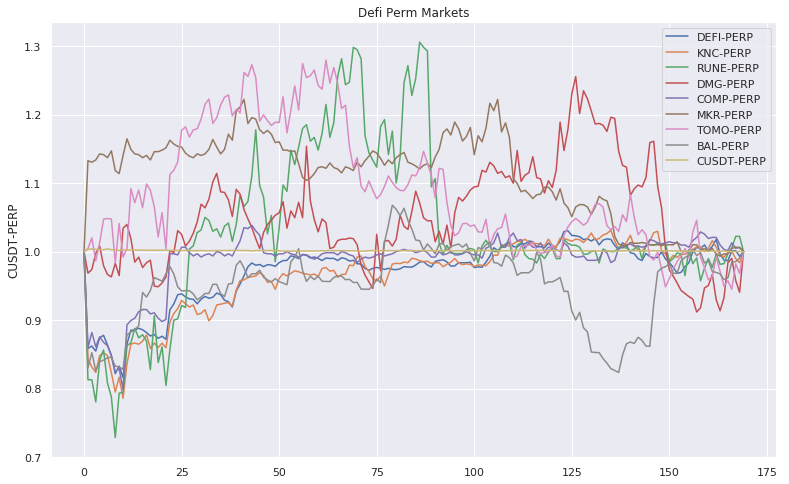

In [12]:

crypto_normed = dfp/dfp.iloc[0]
perp_contracts["DEFI-PERP"].head()
plt.figure(figsize=(13,8))


for x in perp_contracts.keys():
    sns.lineplot(x=crypto_normed.index,
               y=x,
               data=crypto_normed) # .plot(figsize=(12,8))

plt.legend(list(perp_contracts.keys()))
plt.ylabel = "Normalised Close"
plt.title("Defi Perm Markets")
plt.show()

In [13]:
df.dropna(axis=1)

,close,high,low,open,startTime,time,volume
0,1942.9,1961.3,1942.6,1943.2,2020-07-20T23:00:00+00:00,1.595286e+12,39134.5154
1,1668.2,1678.1,1653.1,1675.0,2020-07-27T23:00:00+00:00,1.595891e+12,64603.6148
2,1675.0,1689.0,1652.2,1661.0,2020-07-27T22:00:00+00:00,1.595887e+12,60840.0497
3,1661.0,1698.5,1658.0,1698.5,2020-07-27T21:00:00+00:00,1.595884e+12,182447.8512
4,1698.5,1709.5,1692.0,1705.6,2020-07-27T20:00:00+00:00,1.595880e+12,151290.3584
5,1705.6,1705.6,1672.9,1678.1,2020-07-27T19:00:00+00:00,1.595876e+12,89152.6316
6,1678.1,1679.3,1633.9,1647.9,2020-07-27T18:00:00+00:00,1.595873e+12,291557.5962
7,1647.9,1650.2,1588.3,1596.8,2020-07-27T17:00:00+00:00,1.595869e+12,149955.2878
8,1596.8,1638.5,1591.5,1620.0,2020-07-27T16:00:00+00:00,1.595866e+12,204850.0522
9,1618.4,1623.9,1554.9,1586.2,2020-07-27T15:00:00+00:00,1.595862e+12,179642.5125


In [14]:
import xgboost
def get_feature_importance_data(df):
    data = df.copy()
    y = data['target']
    X = data.drop(["target"], axis=1)
    
    train_samples = int(X.shape[0] * 0.65)
 
    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    y_train = y.iloc[:train_samples]
    y_test = y.iloc[train_samples:]
    
    return (X_train, y_train), (X_test, y_test)
# Get training and test data
def create_model(pca_df):
    (X_train_FI, y_train_FI), (X_test_FI, y_test_FI) = get_feature_importance_data(pca_df)
    regressor = xgboost.XGBRegressor(gamma=0.0,n_estimators=100,base_score=0.7,colsample_bytree=1,learning_rate=0.05)
    xgbModel = regressor.fit(X_train_FI,y_train_FI, \
                             eval_set = [(X_train_FI, y_train_FI), (X_test_FI, y_test_FI)], \
                             verbose=False)
    eval_result = regressor.evals_result()
    return xgbModel, (eval_result)



In [15]:
for marke, data in perp_contracts.items():
    # we first make a model with no indicators
    df = data[["open", "high", "low", "close", "volume"]]
    df["target"] = df['close'].shift(-1)
    xg_mod, results = create_model(df)
    print(f"Analysed /\ : {marke} with no indicators", results['validation_0']['rmse'][-1])

/home/tom/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Analysed /\ : DEFI-PERP with no indicators 14.936454
Analysed /\ : KNC-PERP with no indicators 0.007174
Analysed /\ : RUNE-PERP with no indicators 0.003153
Analysed /\ : DMG-PERP with no indicators 0.004281
Analysed /\ : COMP-PERP with no indicators 1.233509
Analysed /\ : MKR-PERP with no indicators 3.831695
Analysed /\ : TOMO-PERP with no indicators 0.002801
Analysed /\ : BAL-PERP with no indicators 0.090468
Analysed /\ : CUSDT-PERP with no indicators 0.00422


In [20]:
for marke, data in list(perp_contracts.items())[::-1]:
    # we NOW ADD OOUR MODEL IN
    df = deepcopy(data)
    df = df.drop(["startTime", "time"], axis=1)
    df["target"] = data['close'].shift(-1)
    df = ta.add_all_ta_features(df,'open', 'high', 'low', 'close', 'volume')
    # df = df.dropna(axis=0)
    xg_mod, results = create_model(df)
    print(f"Analysed /\ : {marke} with! indicators", results['validation_0']['rmse'][-1])
    # break
    

Analysed /\ : CUSDT-PERP with! indicators 0.00422
Analysed /\ : BAL-PERP with! indicators 0.078873
Analysed /\ : TOMO-PERP with! indicators 0.002797
Analysed /\ : MKR-PERP with! indicators 3.787468
Analysed /\ : COMP-PERP with! indicators 1.112694
Analysed /\ : DMG-PERP with! indicators 0.004263
Analysed /\ : RUNE-PERP with! indicators 0.002425
Analysed /\ : KNC-PERP with! indicators 0.006869
Analysed /\ : DEFI-PERP with! indicators 13.386019


In [21]:
for x, y in (zip(xg_mod.feature_importances_.tolist(), list(df.columns)[:-1])):
    print(x, y)

0.00013642525300383568 close
0.00319161219522357 high
0.0030479070264846087 low
0.0213526152074337 open
0.0 volume
0.1358575075864792 target
0.020497065037488937 volume_adi
0.0 volume_obv
0.0 volume_cmf
0.0 volume_fi
0.0 momentum_mfi
0.0 volume_em
0.0 volume_sma_em
0.2713262736797333 volume_vpt
0.17041535675525665 volume_nvi
0.0 volume_vwap
0.3006121516227722 volatility_atr
0.0 volatility_bbm
0.0 volatility_bbh
0.0 volatility_bbl
8.88305003172718e-05 volatility_bbw
0.0 volatility_bbp
0.0 volatility_bbhi
0.0 volatility_bbli
0.0 volatility_kcc
0.0 volatility_kch
0.0 volatility_kcl
0.0 volatility_kcw
0.0 volatility_kcp
0.0 volatility_kchi
0.0 volatility_kcli
0.0 volatility_dcl
0.0 volatility_dch
0.0 trend_macd
0.0 trend_macd_signal
0.0 trend_macd_diff
0.0 trend_sma_fast
0.0 trend_sma_slow
0.0 trend_ema_fast
0.0002645462518557906 trend_ema_slow
0.0 trend_adx
0.0 trend_adx_pos
0.0 trend_adx_neg
0.0 trend_vortex_ind_pos
0.0 trend_vortex_ind_neg
0.0 trend_vortex_ind_diff
0.0 trend_trix
0.0 tr

In [31]:
results_all = []



def extract_features(model, market, df):
    print(len((model.feature_importances_.tolist())), len(df.columns) -1)
    results = list(zip((model.feature_importances_.tolist(),)))
    res = {}
    
    features =  list(df.columns)[:-1]
    for i, val in enumerate(model.feature_importances_.tolist()):
        res[features[i]] = val
        if features[i] == "target":
            raise
    
#     results_all.append(results)
    return res
    
    
for marke, data in list(perp_contracts.items())[::-1]:
    # we NOW ADD OOUR MODEL IN
    df = deepcopy(data)
    df = df.drop(["startTime", "time"], axis=1)
    df["target"] = data['close'].shift(-1)
    df = ta.add_all_ta_features(df,'open', 'high', 'low', 'close', 'volume')
    # df = df.dropna(axis=0)
    # print(df.columns)
    df = df[[f for f in df.columns if f != "target"] + ["target"]]
    xg_mod, results = create_model(df)
    print(f"Analysed  : {marke} with! indicators", results['validation_0']['rmse'][-1])
    
    
    res = extract_features(xg_mod , marke, df)
    results_all.append(res)
#     break

/home/tom/.local/lib/python3.6/site-packages/ta/trend.py:608: RuntimeWarning:

invalid value encountered in double_scalars

/home/tom/.local/lib/python3.6/site-packages/ta/trend.py:612: RuntimeWarning:

invalid value encountered in double_scalars



Analysed  : CUSDT-PERP with! indicators 0.00422
77 77
Analysed  : BAL-PERP with! indicators 0.078873
77 77
Analysed  : TOMO-PERP with! indicators 0.002797
77 77
Analysed  : MKR-PERP with! indicators 3.787468
77 77
Analysed  : COMP-PERP with! indicators 1.112694
77 77
Analysed  : DMG-PERP with! indicators 0.004263
77 77
Analysed  : RUNE-PERP with! indicators 0.002425
77 77
Analysed  : KNC-PERP with! indicators 0.006869
77 77
Analysed  : DEFI-PERP with! indicators 13.38602
77 77


In [23]:

fin_df = pd.DataFrame(results_all).iloc[:7].mean()
out = fin_df.sort_values(ascending=False).iloc[:10]
out

open              0.299261
high              0.142933
volume_vwap       0.130839
volume_nvi        0.100128
volume_adi        0.058146
volatility_bbm    0.043010
trend_sma_fast    0.026339
volume_fi         0.025624
trend_adx_pos     0.024083
volatility_bbw    0.022199
dtype: float64

In [35]:
# df = df.drop(["startTime", "time"], axis=1)
df["target"] = data['close'].shift(-1)
df.dropna(axis=1).head()

,close,high,low,open,volume,volume_adi,volume_obv,volume_vpt,volume_nvi,volatility_atr,...,volatility_kcli,trend_adx,trend_adx_pos,trend_adx_neg,trend_ichimoku_b,trend_visual_ichimoku_b,trend_psar_up_indicator,trend_psar_down_indicator,others_dr,others_cr
0,1942.9,1961.3,1942.6,1943.2,39134.5154,-37878.862499,39134.5154,1182.693322,1000.000000,0.0,...,0.0,0.0,0.0,0.0,1951.95,1859.723529,0.0,0.0,2.990049,0.000000
1,1668.2,1678.1,1653.1,1675.0,64603.6148,-24441.310621,-25469.0994,-7963.943515,1000.000000,0.0,...,1.0,0.0,0.0,0.0,1807.20,1859.723529,0.0,0.0,-14.138659,-14.138659
2,1675.0,1689.0,1652.2,1661.0,60840.0497,-9892.603084,35370.9503,-8886.085365,1004.076250,0.0,...,1.0,0.0,0.0,0.0,1806.75,1859.723529,0.0,1.0,0.407625,-13.788666
3,1661.0,1698.5,1658.0,1698.5,182447.8512,-165311.142995,-147076.9009,-1276.938020,1004.076250,0.0,...,1.0,0.0,0.0,0.0,1806.75,1859.723529,0.0,0.0,-0.835821,-14.509239
4,1698.5,1709.5,1692.0,1705.6,151290.3584,-204214.378012,4213.4575,1890.708998,1026.745039,0.0,...,1.0,0.0,0.0,0.0,1806.75,1859.723529,0.0,0.0,2.257676,-12.579134


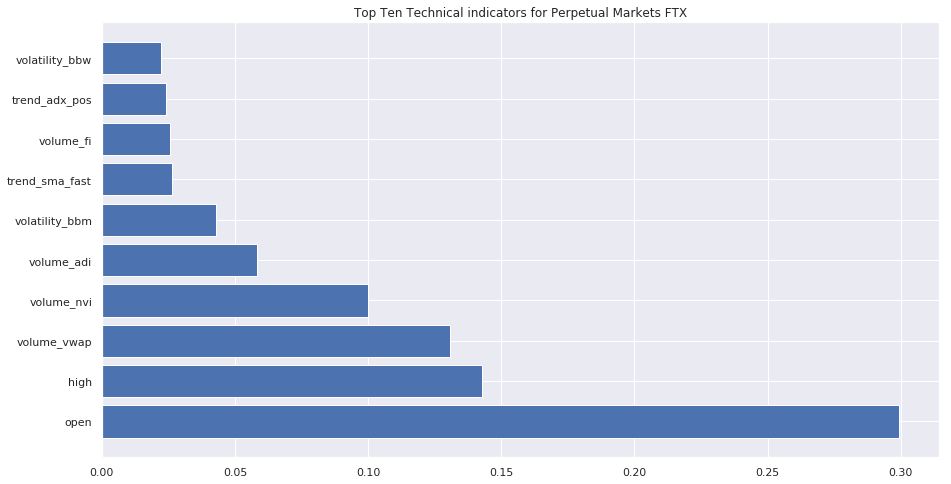

In [25]:
# results_all

# for each of our models, we need to retrieve the feature importance
import numpy as np

plt.figure(figsize=(15,8))
# now we have all our results_all, for each indicator, we will take an average:

fin_df = pd.DataFrame(results_all).iloc[:7].mean()
out = fin_df.sort_values(ascending=False).iloc[:10]

# y_pos = np.arrange(len(bars))

plt.ylabel ="Indicator"
plt.xlabel= "Feature Importance"
plt.title("Top Ten Technical indicators for Perpetual Markets FTX")

plt.barh(range(len(out.index)), out.values)
plt.yticks(range(len(out.index)), out.index)


# plt.show()


plt.savefig("TopTenIndicators.png")


In [26]:
out.index

Index(['open', 'high', 'volume_vwap', 'volume_nvi', 'volume_adi',
       'volatility_bbm', 'trend_sma_fast', 'volume_fi', 'trend_adx_pos',
       'volatility_bbw'],
      dtype='object')

In [137]:
# df = df.set_index("startTime")
# df["target"] = df['close'].shift(1)
df = deepcopy(data)
df["target"] = data['close'].shift(-1)
df.head()

,close,high,low,open,startTime,time,volume,target
0,0.020168,0.020168,0.020168,0.020168,2020-07-20T23:00:00+00:00,1.595286e+12,0.000000,0.020223
1,0.020223,0.020247,0.020207,0.020247,2020-07-27T19:00:00+00:00,1.595876e+12,544.659905,0.020247
2,0.020247,0.020247,0.020220,0.020223,2020-07-27T18:00:00+00:00,1.595873e+12,0.890377,0.020225
3,0.020225,0.020247,0.020218,0.020223,2020-07-27T17:00:00+00:00,1.595869e+12,21.618388,0.020223
4,0.020223,0.020247,0.020193,0.020198,2020-07-27T16:00:00+00:00,1.595866e+12,16899.914137,0.020198


In [36]:
# ta.add_all_ta_features(df,'open', 'high', 'low', 'close', 'volume')
# process_df(data)



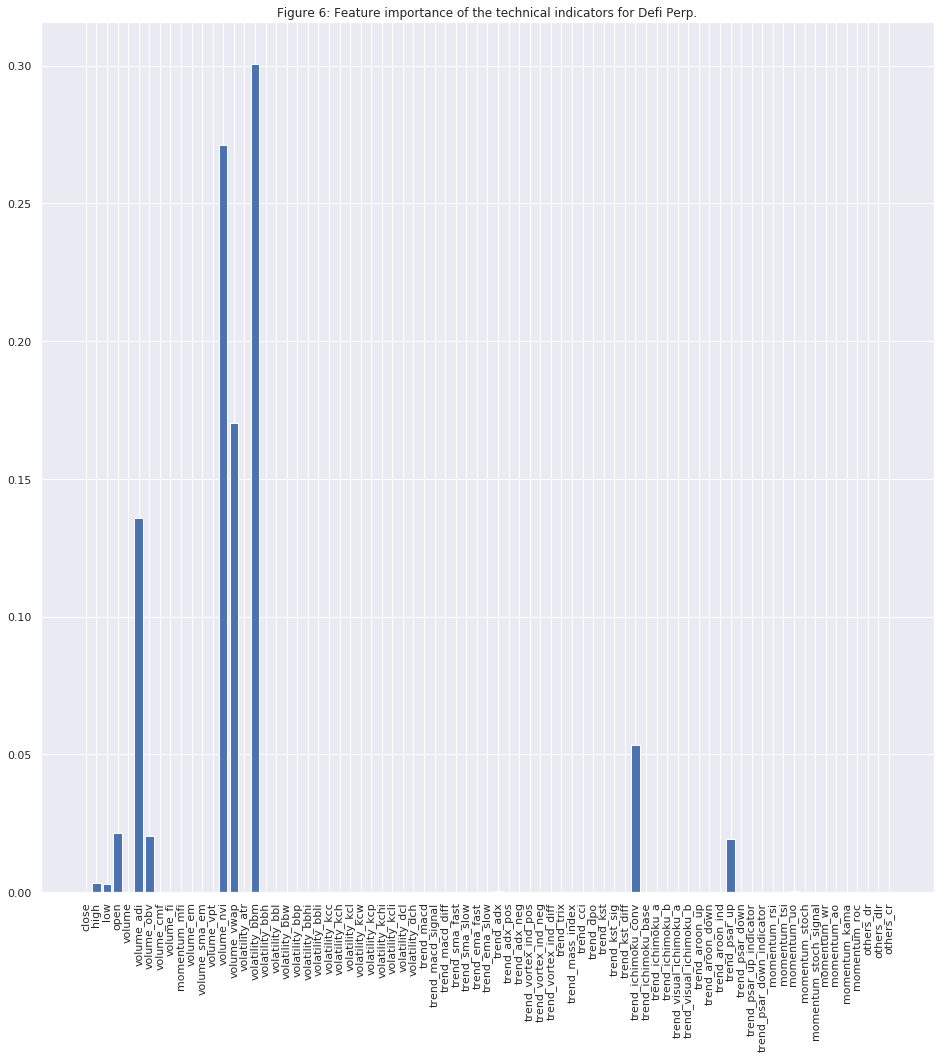

In [32]:
fig = plt.figure(figsize=(16,16))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(xg_mod.feature_importances_))], xg_mod.feature_importances_.tolist(), tick_label=list(df.columns)[:-1], )
plt.title('Figure 6: Feature importance of the technical indicators for Defi Perp.')
plt.savefig("./imgs/Feature_importance_of_Technical_indicators.png")
plt.show()